## Analyzing Crime Data from Seattle (2008-Present)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)


Import File:

In [0]:
print(os.listdir('../input'))

The next hidden code cells define functions for plotting data. Click on the "Code" button in the published kernel to reveal the hidden code.

In [2]:
# Histogram of column data
def plotHistogram(df, nHistogramShown, nHistogramPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nHistRow = (nCol + nHistogramPerRow - 1) / nHistogramPerRow
    plt.figure(num=None, figsize=(6*nHistogramPerRow, 8*nHistRow), dpi=80, facecolor='w', edgecolor='k')
    for i in range(min(nCol, nHistogramShown)):
        plt.subplot(nHistRow, nHistogramPerRow, i+1)
        df.iloc[:,i].hist()
        plt.ylabel('counts')
        plt.xticks(rotation=90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad=1.0, w_pad=1.0, h_pad=1.0)
    plt.show()


In [3]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()


In [8]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Now you're ready to read in the data and use the plotting functions to visualize the data.

### Let's check 1st file: ../input/seattle-crime-stats-by-1990-census-tract-1996-2007.csv

In [7]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# seattle-crime-stats-by-1990-census-tract-1996-2007.csv has 14268 rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('crime.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'data96.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


Let's take a quick look at what the data looks like:

In [9]:
df1.head(5)

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368


Histogram of sampled columns:

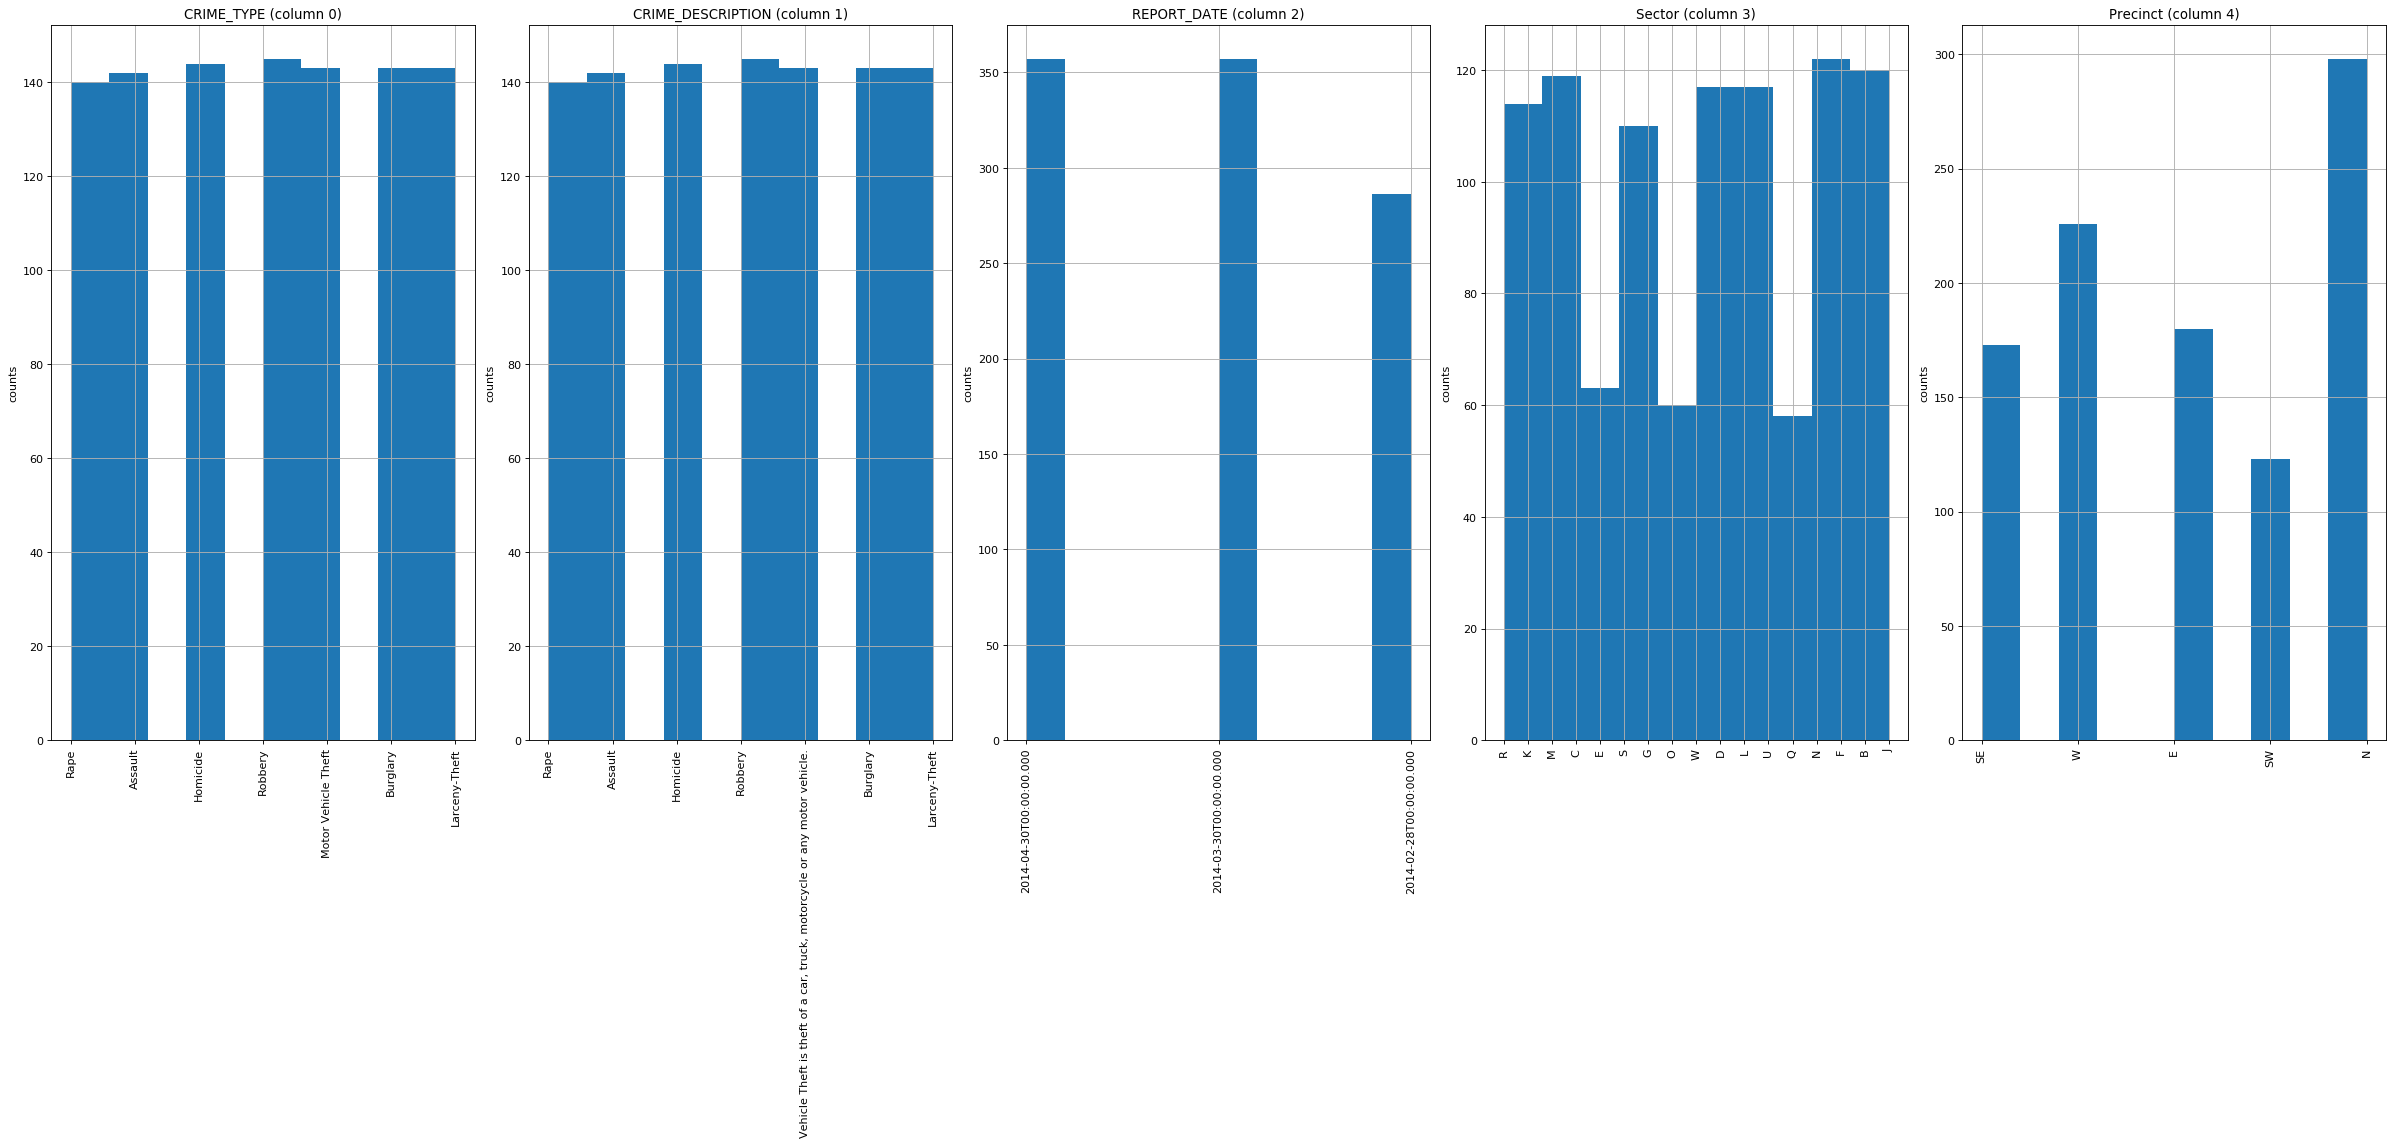

In [11]:
plotHistogram(df1, 10, 5)

Correlation matrix:

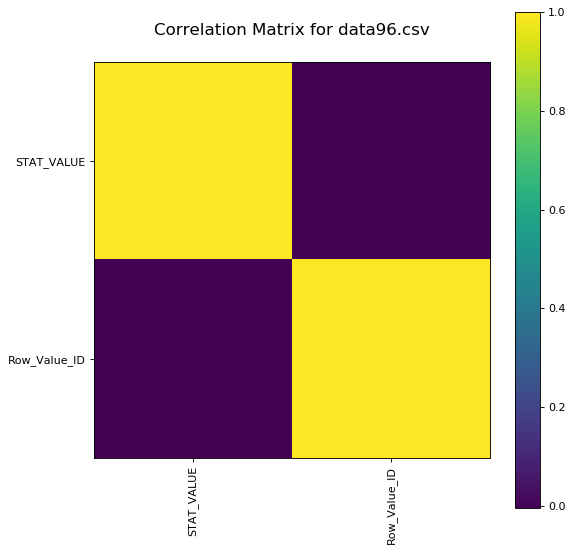

In [12]:
plotCorrelationMatrix(df1, 8)

Scatter and density plots:

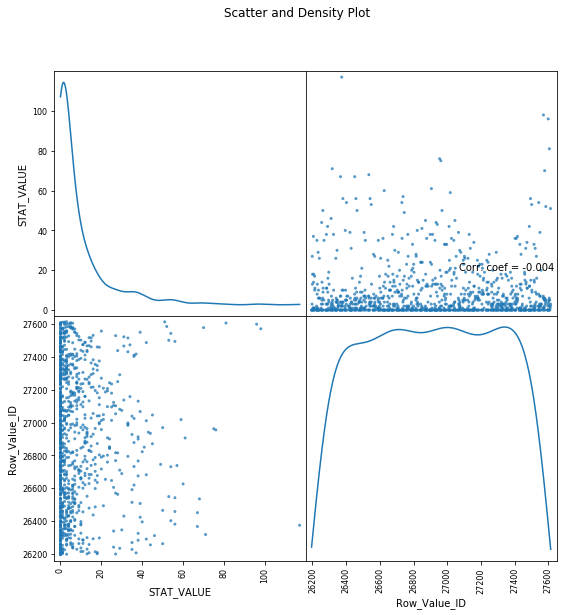

In [13]:
plotScatterMatrix(df1, 9, 10)

### Let's check 2nd file: ../input/seattle-crime-stats-by-police-precinct-2008-present.csv

In [15]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# seattle-crime-stats-by-police-precinct-2008-present.csv has 27125 rows in reality, but we are only loading/previewing the first 1000 rows
df2 = pd.read_csv('crime.csv', delimiter=',', nrows = nRowsRead)
df2.dataframeName = 'data96.csv'
nRow, nCol = df2.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 8 columns


Let's take a quick look at what the data looks like:

In [16]:
df2.head(5)

,Police Beat,CRIME_TYPE,CRIME_DESCRIPTION,STAT_VALUE,REPORT_DATE,Sector,Precinct,Row_Value_ID
0,R2,Rape,Rape,1,2014-04-30T00:00:00.000,R,SE,27092
1,K2,Assault,Assault,5,2014-04-30T00:00:00.000,K,W,26506
2,M2,Homicide,Homicide,1,2014-04-30T00:00:00.000,M,W,27567
3,C3,Robbery,Robbery,2,2014-04-30T00:00:00.000,C,E,26225
4,E2,Motor Vehicle Theft,"Vehicle Theft is theft of a car, truck, motorc...",7,2014-04-30T00:00:00.000,E,E,26368


Histogram of sampled columns:

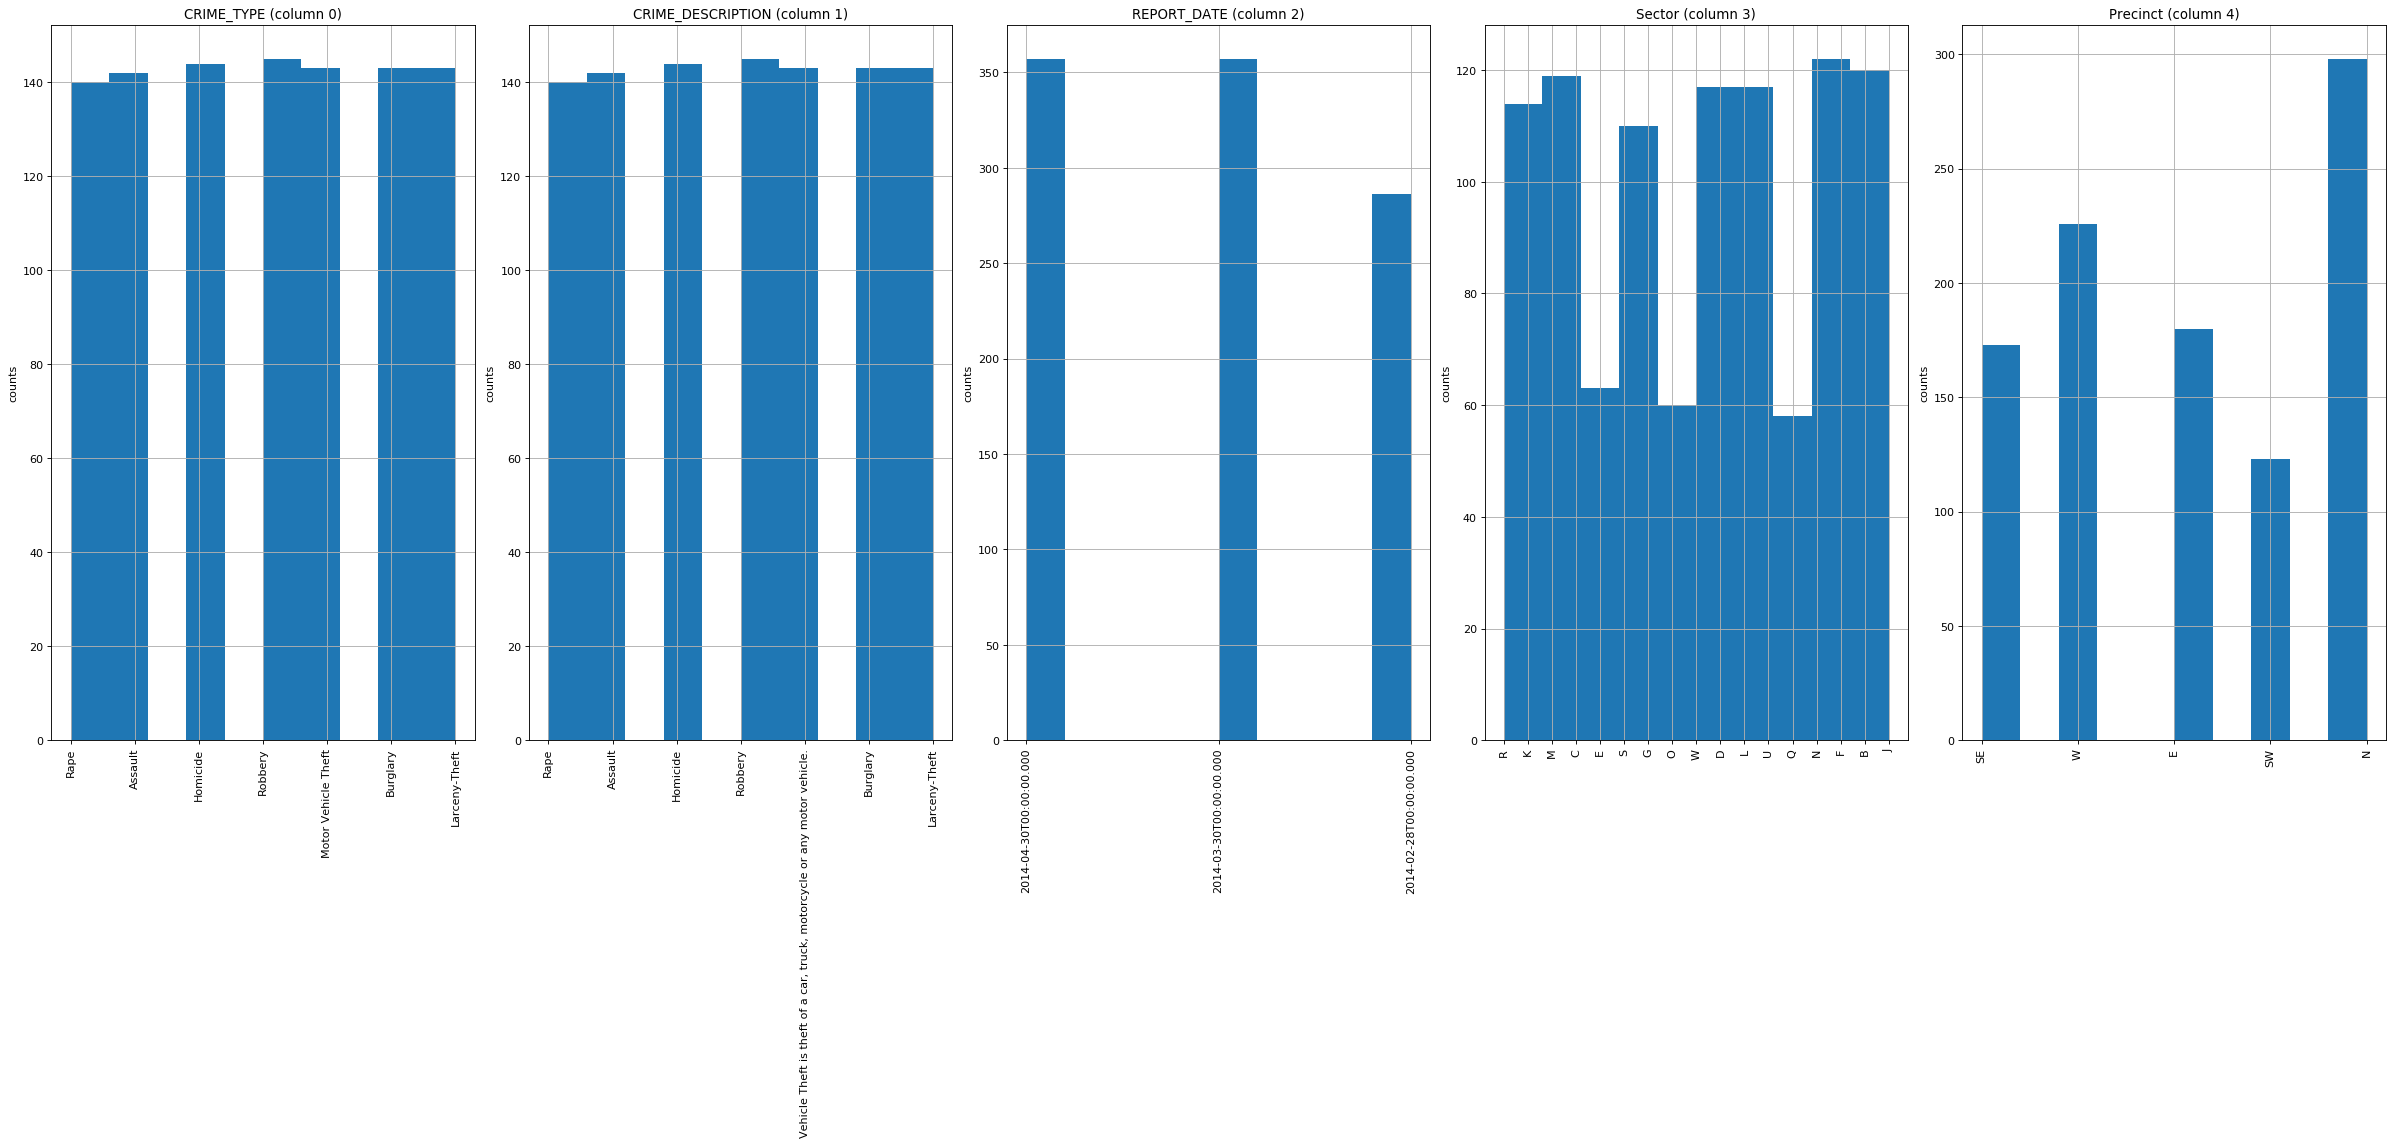

In [17]:
plotHistogram(df2, 10, 5)

Correlation matrix:

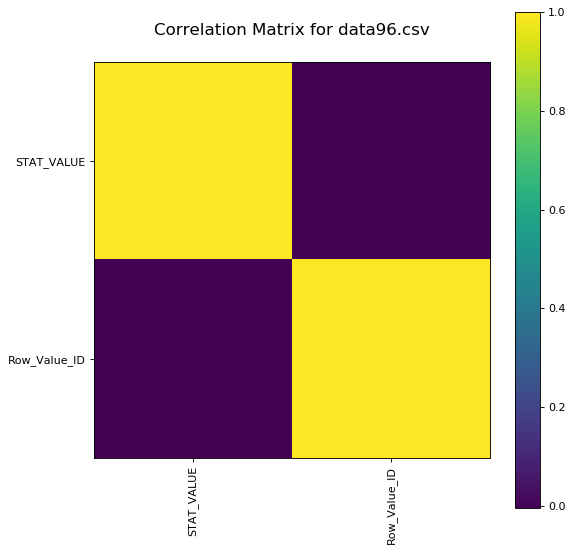

In [18]:
plotCorrelationMatrix(df2, 8)

Scatter and density plots:

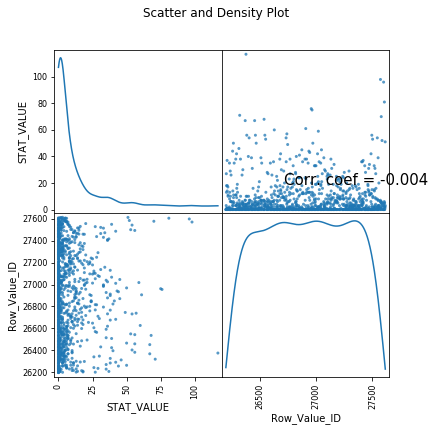

In [20]:
plotScatterMatrix(df2, 6, 15)